In [67]:
from CLogDKPd import CLogDKPd_MGE, CLogDKPd_MGmB, CLogDKPd_MGE_Ordenado, sigmoid, sinal
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [68]:
# carregar dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filtrar dataset apenas para digito de 0 a 4
#train_filter = np.where(y_train < 2)
#test_filter = np.where(y_test < 2)
train_filter = np.where((y_train == 1) | (y_train == 9))
test_filter = np.where((y_test == 1) | (y_test == 9))



x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

In [69]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

x_train, y_train = select_first_n_per_class(x_train, y_train, 200)
x_test, y_test = select_first_n_per_class(x_test, y_test, 200)

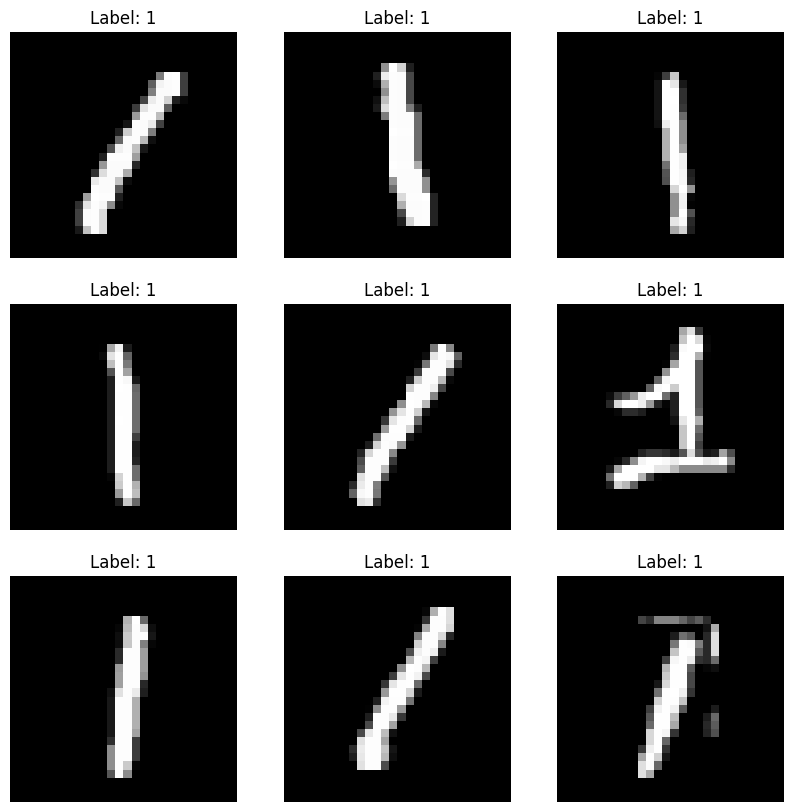

In [70]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()


plot_images(x_train, y_train)

In [71]:
x_train_array = x_train.reshape((len(x_train), 784))
x_test_array = x_test.reshape((len(x_test), 784))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train = x_train_array.astype('float32')
x_test = x_test_array.astype('float32')
#x_train = x_train/255
#x_test = x_test/255

y_train[y_train==1]=0
y_train[y_train==9]=1
y_test[y_test==1]=0
y_test[y_test==9]=1
print('X shape:', x_train.shape)

X shape: (400, 784)


In [72]:
eta = 0.5
epochs = 500
alpha = np.zeros(len(x_train))
d=2
batch_size = len(x_train)
alpha, E = CLogDKPd_MGmB(x_train, y_train, alpha, eta, epochs, d, batch_size)

c:\Users\faust\OneDrive\Ambiente de Trabalho\MASTER\II SEMESTRE\OML\TRABALHO DE OML\CLogDKPd.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\faust\OneDrive\Ambiente de Trabalho\MASTER\II SEMESTRE\OML\TRABALHO DE OML\CLogDKPd.py:24: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
c:\Users\faust\OneDrive\Ambiente de Trabalho\MASTER\II SEMESTRE\OML\TRABALHO DE OML\CLogDKPd.py:24: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


[-1.76485038e+14 -2.27116612e+13 -2.93162283e+13 -5.23229148e+13
 -1.58220622e+14  4.30668450e+13 -8.54085033e+13 -1.93488159e+14
 -1.34171054e+14 -3.67750954e+13 -6.20574456e+13 -1.95897636e+14
 -1.33366897e+14 -9.51396241e+13 -6.14098367e+13 -8.05739744e+12
 -2.23663173e+14 -7.21280618e+13 -2.34123734e+14 -5.69079644e+13
 -1.03133674e+14  1.31919426e+14 -1.24520891e+14 -8.43263645e+13
 -1.72385475e+14 -5.10078956e+13 -1.75333546e+13 -1.46831829e+14
 -1.99774247e+14 -1.27876930e+14 -1.61707029e+14  2.04518508e+14
 -1.63128982e+14  1.22597016e+12 -1.37693883e+14 -1.74389245e+14
 -5.11803193e+13 -7.18933737e+13 -1.51716415e+14 -1.60796613e+14
 -6.61208957e+13 -2.00951890e+14 -1.81174069e+14 -1.71345439e+14
 -2.12049280e+14 -1.88042392e+14 -2.45150840e+13 -6.55207034e+13
 -7.52936204e+13 -1.24138753e+13 -1.89074158e+14 -4.95464156e+13
 -1.87047881e+13 -7.82346161e+13 -1.19920201e+14 -1.73559024e+14
 -1.85946985e+14 -1.06680428e+14 -4.65842555e+13 -1.71694472e+14
 -8.33345877e+13  2.34533

In [73]:
A=np.dot(x_test,x_test.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    y_chapeu_all.append(sinal(p_chapeu))

0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
1.0
1
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
1.0
1
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0


In [74]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [75]:
from sklearn.metrics import confusion_matrix

cm_fc = confusion_matrix(y_true=y_test, y_pred=y_chapeu_all)

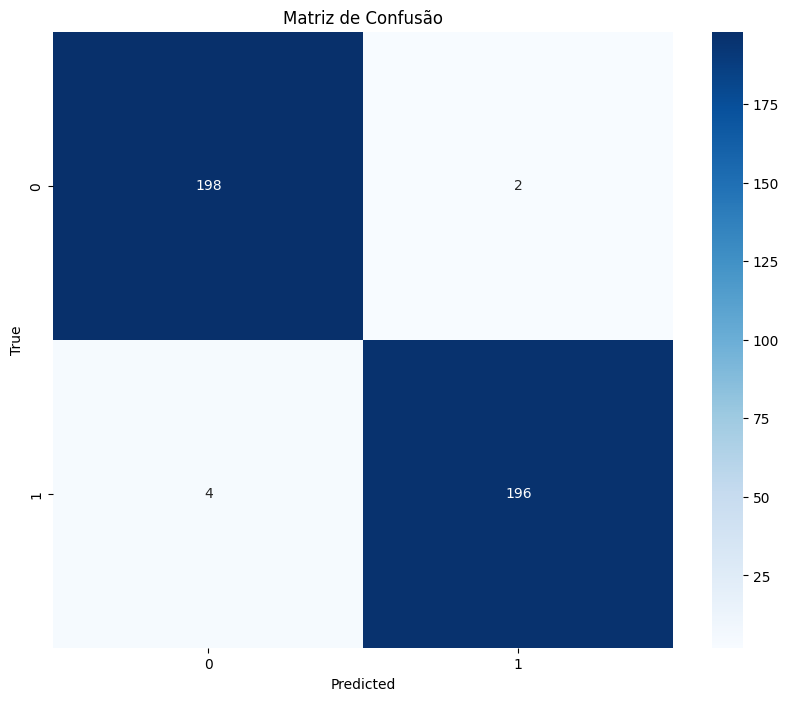

In [76]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

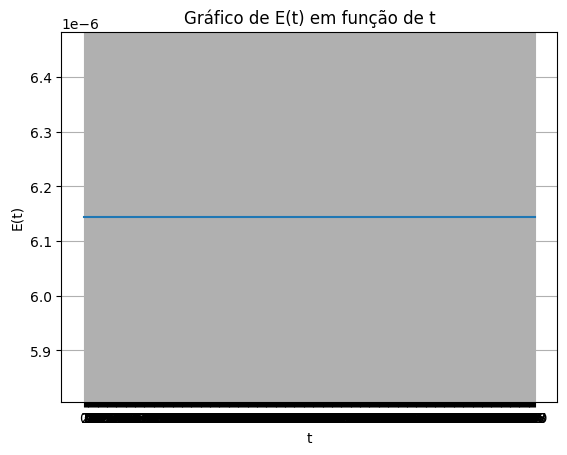

In [77]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [78]:
data = pd.read_csv('Ex2_D.csv', header=None)
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
eta = 0.1
epochs = 2000
alpha = np.zeros(len(X))
d=2
alpha, E = CLogDKPd_MGE_Ordenado(X, Y, alpha, eta, epochs, d)
print(alpha)

[ 6.90702547 -5.03556118 -4.91297779  4.02503407]


In [79]:
A=np.dot(X,X.T)
A=A**d
for n in range(len(X)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))

0.7278062164600037
1
0.11424847815962487
0
0.1570543467644276
0
0.9657155103313495
1


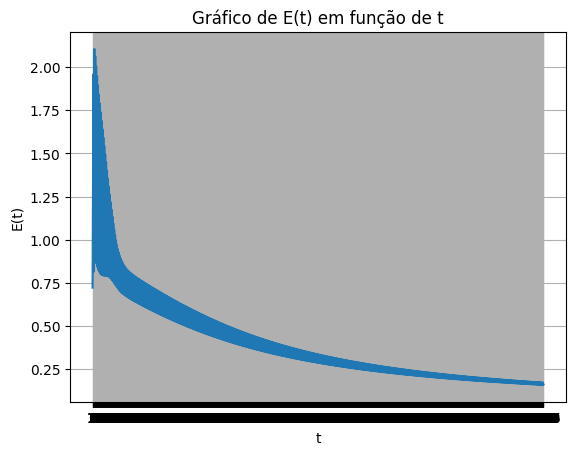

In [80]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()